In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
import keras.utils
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Flatten
import cv2

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

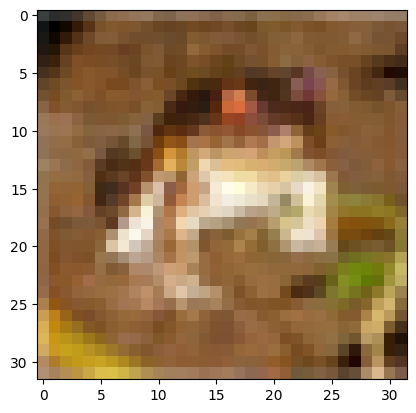

In [ ]:
plt.imshow(X_train[0])

In [ ]:
aux = cv2.resize(X_train[0], (20,20))

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train_resize = np.ndarray(shape= (len(X_train), 20, 20, 3))
X_train_resize.shape

(50000, 20, 20, 3)

In [ ]:
for i in range(len(X_train)):
  aux = cv2.resize(X_train[i], (20,20))
  aux = aux/255
  X_train_resize[i] =  aux

In [ ]:
X_test_resize = np.ndarray(shape= (len(X_test), 20, 20, 3))
X_test_resize.shape

(10000, 20, 20, 3)

In [ ]:
for i in range(len(X_test)):
  aux = cv2.resize(X_test[i], (20,20))
  aux = aux/255
  X_test_resize[i] =  aux

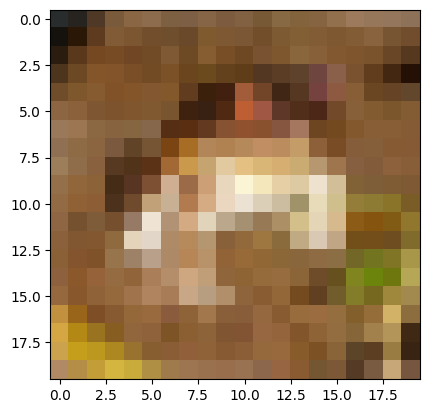

In [ ]:
plt.imshow(X_train_resize[0])

In [ ]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
X_train_resize = X_train_resize.reshape(X_train.shape[0], 20, 20, 3)
X_test_resize = X_test_resize.reshape(X_test.shape[0], 20, 20, 3)

X_train_resize = X_train_resize.astype('float32')
X_test_resize = X_test_resize.astype('float32')

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# CONVOLUTIONAL LAYER 1
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(20,20,3)))
# POOLING LAYER 1
model.add(MaxPool2D(pool_size=(1,1)))
# CONVOLUTIONAL LAYER 2
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
# POOLING LAYER 2
model.add(MaxPool2D(pool_size=(2,2)))
# CONVOLUTIONAL LAYER 3
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
# POOLING LAYER 3
model.add(MaxPool2D(pool_size=(3,3)))
# flatten output of conv
model.add(Flatten())

#FULLY CONNECTED NETWORK

# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model for 10 epochs
model.fit(X_train_resize, Y_train, batch_size=128, epochs=15, validation_data=(X_test_resize, Y_test))

Epoch 1/15
391/391 [==============================] - 46s 109ms/step - loss: 1.7907 - accuracy: 0.3445 - val_loss: 1.5445 - val_accuracy: 0.4351
Epoch 2/15
391/391 [==============================] - 38s 98ms/step - loss: 1.4743 - accuracy: 0.4645 - val_loss: 1.4433 - val_accuracy: 0.4821
Epoch 3/15
391/391 [==============================] - 40s 102ms/step - loss: 1.3615 - accuracy: 0.5093 - val_loss: 1.3085 - val_accuracy: 0.5239
Epoch 4/15
391/391 [==============================] - 37s 96ms/step - loss: 1.2868 - accuracy: 0.5374 - val_loss: 1.3121 - val_accuracy: 0.5276
Epoch 5/15
391/391 [==============================] - 38s 97ms/step - loss: 1.2307 - accuracy: 0.5598 - val_loss: 1.2184 - val_accuracy: 0.5630
Epoch 6/15
391/391 [==============================] - 40s 101ms/step - loss: 1.1763 - accuracy: 0.5813 - val_loss: 1.1685 - val_accuracy: 0.5842
Epoch 7/15
391/391 [==============================] - 38s 98ms/step - loss: 1.1365 - accuracy: 0.5969 - val_loss: 1.1581 - val_accura

In [ ]:
#scaled back

In [ ]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# CONVOLUTIONAL LAYER 1
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
# POOLING LAYER 1
model.add(MaxPool2D(pool_size=(1,1)))
# CONVOLUTIONAL LAYER 2
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
# POOLING LAYER 2
model.add(MaxPool2D(pool_size=(2,2)))
# CONVOLUTIONAL LAYER 3
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
# POOLING LAYER 3
model.add(MaxPool2D(pool_size=(3,3)))
# flatten output of conv
model.add(Flatten())

#FULLY CONNECTED NETWORK

# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=15, validation_data=(X_test, Y_test))

Epoch 1/15
391/391 [==============================] - 127s 319ms/step - loss: 1.6609 - accuracy: 0.4036 - val_loss: 1.3988 - val_accuracy: 0.5019
Epoch 2/15
391/391 [==============================] - 122s 313ms/step - loss: 1.3177 - accuracy: 0.5307 - val_loss: 1.2200 - val_accuracy: 0.5680
Epoch 3/15
391/391 [==============================] - 121s 310ms/step - loss: 1.1642 - accuracy: 0.5913 - val_loss: 1.1363 - val_accuracy: 0.5964
Epoch 4/15
391/391 [==============================] - 124s 318ms/step - loss: 1.0707 - accuracy: 0.6242 - val_loss: 1.0917 - val_accuracy: 0.6197
Epoch 5/15
391/391 [==============================] - 129s 331ms/step - loss: 1.0039 - accuracy: 0.6489 - val_loss: 1.0119 - val_accuracy: 0.6541
Epoch 6/15
391/391 [==============================] - 120s 307ms/step - loss: 0.9454 - accuracy: 0.6688 - val_loss: 0.9954 - val_accuracy: 0.6543
Epoch 7/15
391/391 [==============================] - 121s 310ms/step - loss: 0.8998 - accuracy: 0.6855 - val_loss: 0.9798 -

In [ ]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.93647754>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.6905>}